In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sentinelhub import SentinelHubRequest, DataCollection, MimeType, CRS, BBox, SHConfig
from dotenv import load_dotenv
from pyproj import Transformer
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import folium
import cv2
from urban_watch.ml_logic.data import load_data
from s2cloudless import S2PixelCloudDetector
from urban_watch.ml_logic.package import CloudMasker
from urban_watch.ml_logic.package import preprocess_image

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

import time

/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sentinelhub import SHConfig
from dotenv import load_dotenv
import os

In [19]:
from urban_watch.interface.main import full_preproc_pipeline
from urban_watch.interface.main import train
from urban_watch.interface.main import evaluate
#  Entrainement d'un nouveau modele
X,y = full_preproc_pipeline()
metrics = train(X,y, model_type="random_forest")


🚀 Running PREPROCESSING PIPELINE...

✅ Features are loaded 

X shape: (500, 500, 10)
⬇️ Téléchargement GCP + reprojection pour tile 0
💾 Sauvegardé dans /home/k2805/code/augustinlafond/project_urban_watch/data/labels_y/tile_0/label.tif
⬇️ Téléchargement GCP + reprojection pour tile 1
💾 Sauvegardé dans /home/k2805/code/augustinlafond/project_urban_watch/data/labels_y/tile_1/label.tif
⬇️ Téléchargement GCP + reprojection pour tile 2
💾 Sauvegardé dans /home/k2805/code/augustinlafond/project_urban_watch/data/labels_y/tile_2/label.tif
⬇️ Téléchargement GCP + reprojection pour tile 3
💾 Sauvegardé dans /home/k2805/code/augustinlafond/project_urban_watch/data/labels_y/tile_3/label.tif
⬇️ Téléchargement GCP + reprojection pour tile 4
💾 Sauvegardé dans /home/k2805/code/augustinlafond/project_urban_watch/data/labels_y/tile_4/label.tif
⬇️ Téléchargement GCP + reprojection pour tile 5
💾 Sauvegardé dans /home/k2805/code/augustinlafond/project_urban_watch/data/labels_y/tile_5/label.tif
⬇️ Téléchargem

2025/11/25 14:30:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.


✅ Model trained : {'precision_train': 0.8848167261954155, 'recall_train': 0.6717999107223048, 'f1_train': 0.7637330651183346, 'accuracy_train': 0.9155771845593308}
✅ Results saved on mlflow


Registered model 'random_forest_model' already exists. Creating a new version of this model...
2025/11/25 14:33:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: random_forest_model, version 3


model logged to mlflow
✅ mlflow_run auto-log done


Created version '3' of model 'random_forest_model'.


In [16]:
import requests
url = "http://localhost:8000/predict"
params = {
    "date": "2021-06-15",
    "lon": 0.10432014043169194,
    "lat": 43.23224498737862,
    "size_km": 3
}
response = requests.get(url, params=params)

KeyboardInterrupt: 

In [12]:
response=response.json()
response


{'error': 'SentinelHub download failed: (invalid_client) Invalid client or Invalid client credentials'}

In [4]:
load_dotenv()  # charge automatiquement le .env du dossier courant

config = SHConfig()
config.sh_client_id = os.environ.get("SH_CLIENT_ID")
config.sh_client_secret = os.environ.get("SH_CLIENT_SECRET")

In [ ]:
list_bbox_centers = [(43.52960344286241, 5.448962145567533),
(48.092094070852475, -1.7036876101196967),
 (48.121222106840435, -1.602864906604979),
 (45.74557103359813, 4.803091960652229),
 (47.8776770361181, -3.909947991759771),
 (44.55378060775165, 4.28389205759154),
 (45.69764498502806, 5.8945655967385315),
 (48.07500134978729, 7.3491231648955155),
 (50.63412206750312, 3.0435779303880106),
 (44.83078182200822, 0.5108123933396876)]

In [6]:
from urban_watch.ml_logic.data import make_bbox_global, get_data

data = get_data(list_bbox_centers, config)

📡 Downloading tile 0 at 43.52960344286241,5.448962145567533 ...
✔ Saved tile 0 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_0
📡 Downloading tile 1 at 48.092094070852475,-1.7036876101196967 ...
✔ Saved tile 1 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_1
📡 Downloading tile 2 at 48.121222106840435,-1.602864906604979 ...
✔ Saved tile 2 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_2
📡 Downloading tile 3 at 45.74557103359813,4.803091960652229 ...
✔ Saved tile 3 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_3
📡 Downloading tile 4 at 47.8776770361181,-3.909947991759771 ...
✔ Saved tile 4 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_4
📡 Downloading tile 5 at 44.55378060775165,4.28389205759154 ...
✔ Saved tile 5 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_5
📡 Downloading tile 6 at 45.69764498502806,5.8945655967385315 ...
✔ Saved tile 6 in /home/k2805/c

In [7]:
from urban_watch.ml_logic.data import load_data

X, meta = load_data()
print("shape de x:", X.shape)
print("Nombre de NaN dans X brut :", np.isnan(X).sum())

shape de x: (10, 300, 300, 10)
Nombre de NaN dans X brut : 0


In [8]:
from urban_watch.ml_logic.labels import get_bbox_from_features, bbox_to_wgs84

list_bbox, list_crs = get_bbox_from_features()
list_bbox_wgs84 = bbox_to_wgs84(list_bbox, list_crs)

/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.6) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [9]:
from urban_watch.ml_logic.labels import tile_name_from_bbox_wgs84

tile_names = tile_name_from_bbox_wgs84(list_bbox_wgs84)

In [10]:
from urban_watch.ml_logic.labels import get_label_array

results = get_label_array(tile_names, list_bbox_wgs84, list_bbox, list_crs)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Exemple palette simplifiée
colors = [
    "#006400",  # 10 Trees
    "#ffbb22",  # 20 Shrub
    "#ffff4c",  # 30 Grass
    "#f096ff",  # 40 Crop
    "#fa0000",  # 50 Built-up
    "#b4b4b4",  # 60 Bare
    "#f0f0f0",  # 70 Snow
    "#0064c8",  # 80 Water
    "#0096a0",  # 90 Wetlands
    "#00cf75",  # 95 Mangroves
    "#fae6a0"   # 100 Moss/Lichen
]

cmap = ListedColormap(colors)
y_list =results
y = np.array(y_list)

print("Labels uniques :", np.unique(y))
print("Shape y:", y.shape)


Labels uniques : [ 0 10 20 30 40 50 60 80 90]
Shape y: (10, 300, 300)


debut du test train model avec le Y


In [12]:
X_list = []
y_list = []
for i in range(X.shape[0]):
    img = X[i]
    label = y[i]

    X_processed, mask_valid= preprocess_image(img)

    y_flat = label.reshape(-1)
    y_valid = y_flat[mask_valid.reshape(-1)]

    X_list.append(X_processed)
    y_list.append(y_valid)

X_all = np.vstack(X_list)
y_all = np.hstack(y_list)

print("X_all", X_all.shape)
print("y_all", y_all.shape)
print("nan dans xall", np.isnan(X_all).sum())


X_all (648654, 13)
y_all (648654,)
nan dans xall 0


In [13]:
y_binary = (y_all == 50).astype(int)
non_urbain_count = (y_binary == 0).sum()
urbain_count = (y_binary == 1).sum()
print(f"  Non-urbain: {non_urbain_count} ({100*non_urbain_count/(non_urbain_count+urbain_count):.1f}%)")
print(f"  Urbain: {urbain_count} ({100*urbain_count/(non_urbain_count+urbain_count):.1f}%)")


  Non-urbain: 397690 (61.3%)
  Urbain: 250964 (38.7%)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
print(f"Train set: {X_train.shape} | Test set: {X_test.shape}")

Train set: (518923, 13) | Test set: (129731, 13)


In [15]:
#_________________________________________________

In [16]:
all_results = []
#fonction pour evaluer le modele
def evaluate_model(param_grid,
                   X_train, X_test, y_train, y_test,
                   model_name, n_iter=12):
    if model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
        search = RandomizedSearchCV(
            model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=3,
            scoring='f1',
            n_jobs=-1,
            random_state=42
        )
    else:
        if model_name == "Gradient Boosting":
            model = GradientBoostingClassifier(random_state=42)
            search = GridSearchCV(
                model,
                param_grid=param_grid,
                cv=3,
                scoring='f1',
                n_jobs=-1
            )
        elif model_name == "XGBoost":
            model = XGBClassifier(random_state=42, use_labels_encoder = False, eval_metric='logloss', tree_method='hist', n_jobs=1)
            search = RandomizedSearchCV(
                model,
                param_distributions=param_grid,
                n_iter=10,
                cv=3,
                scoring='f1',
                n_jobs=1,
                verbose=1
            )
        elif model_name == "Logistic Regression":
            model= LogisticRegression(random_state=42, max_iter=1000)
            search = GridSearchCV(
                model,
                param_grid=param_grid,
                cv=3,
                scoring='f1',
                n_jobs=-1
            )




    search.fit(X_train, y_train)

    best_model= search.best_estimator_
    best_params= search.best_params_

    for param, value in best_params.items():
        print(f"{param} : {value}")

    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:,1]

    acc= accuracy_score(y_test, y_pred)
    prec= precision_score(y_test, y_pred)
    rec= recall_score(y_test, y_pred)
    f1= f1_score(y_test, y_pred)
    roc_auc= roc_auc_score(y_test, y_pred_proba)

    print(f"   Accuracy:  {acc:.4f}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall:    {rec:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   ROC-AUC:   {roc_auc:.4f}")

    cv_scores= cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
    cv_mean= cv_scores.mean()
    cv_std= cv_scores.std()

    print(f"cv f1 score: {cv_scores}")
    print(f"mean: {cv_mean} / ({cv_std})")

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn/(tn+fp) if (tn+fp) >0 else 0

    print(f"confusion de matrix")
    print(f"tp : {tp} | fp: {fp}")
    print(f"fn : {fn} | tn: {tn}")
    print(f"specificity : {specificity}")

    result = {
        "Model":model_name,
        'Best_Params': str(best_params),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC' : roc_auc,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std,
        'Specificity': specificity

    }
    return best_model, result, cm


In [17]:
rf_params = {
    'n_estimators': [150], #200-250
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1]
}
rf_best, rf_result, rf_cm = evaluate_model(rf_params, X_train, X_test, y_train, y_test, "Random Forest")
all_results.append(rf_result)

/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=12. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


n_estimators : 150
min_samples_split : 10
min_samples_leaf : 1
max_depth : 20
   Accuracy:  0.8450
   Precision: 0.7783
   Recall:    0.8381
   F1-Score:  0.8071
   ROC-AUC:   0.9265
cv f1 score: [0.80380037 0.80530633 0.80262636 0.80173421 0.80344848]
mean: 0.8033831500091182 / (0.0011973889799368133)
confusion de matrix
tp : 42067 | fp: 11984
fn : 8126 | tn: 67554
specificity : 0.8493298800573311


In [18]:
xgb_params = {
    'n_estimators': [100,200],
    'learning_rate': [0.01,0.05, 0.1],
    'max_depth': [3,5,7],
    'subsample':[0.8,1]
}
xgb_best, xgb_result, xgb_cm = evaluate_model(xgb_params, X_train, X_test, y_train, y_test, "XGBoost")
all_results.append(xgb_result)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:38:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:38:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:38:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:38:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_en

subsample : 0.8
n_estimators : 200
max_depth : 7
learning_rate : 0.05
   Accuracy:  0.8258
   Precision: 0.7838
   Recall:    0.7593
   F1-Score:  0.7714
   ROC-AUC:   0.9072


/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:40:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:40:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:40:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [22:40:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_labels_en

cv f1 score: [0.77181719 0.77049139 0.76947234 0.76929118 0.76969705]
mean: 0.7701538282774623 / (0.0009271419164354943)
confusion de matrix
tp : 38111 | fp: 10512
fn : 12082 | tn: 69026
specificity : 0.867836757273253


In [19]:
lr_params = {
    'C': [0.001,0.01,0.1,1],
    'solver': ['lgbfs', 'liblinear']
}
lr_best, lr_result, lr_cm = evaluate_model(lr_params, X_train, X_test, y_train, y_test, "Logistic Regression")
all_results.append(lr_result)

/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.10/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/home/k2805/.pyenv/versions/3.10.6/envs/urban_watch/lib/python3.1

C : 1
solver : liblinear
   Accuracy:  0.7470
   Precision: 0.7074
   Recall:    0.5904
   F1-Score:  0.6436
   ROC-AUC:   0.8053
cv f1 score: [0.64271397 0.63716718 0.64123925 0.63788343 0.64172009]
mean: 0.6401447824707187 / (0.002202728012592933)
confusion de matrix
tp : 29635 | fp: 12258
fn : 20558 | tn: 67280
specificity : 0.8458849857929543


In [20]:
df_results = pd.DataFrame(all_results)
summary_df = df_results[['Model','Accuracy','Precision','Recall', 'F1-Score','ROC-AUC', 'CV_Mean', 'Specificity']].copy()
summary_df= summary_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)
print(summary_df.to_string(index=True))

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC   CV_Mean  Specificity
0        Random Forest  0.844987   0.778283  0.838105  0.807087  0.926493  0.803383     0.849330
1              XGBoost  0.825840   0.783806  0.759289  0.771353  0.907187  0.770154     0.867837
2  Logistic Regression  0.747046   0.707397  0.590421  0.643637  0.805343  0.640145     0.845885


In [21]:
best_idx = summary_df.index[0]
best_model_name = summary_df.loc[best_idx, 'Model']
best_f1 = summary_df.loc[best_idx, 'F1-Score']
print(best_model_name)
print(best_f1)

Random Forest
0.8070872184490234


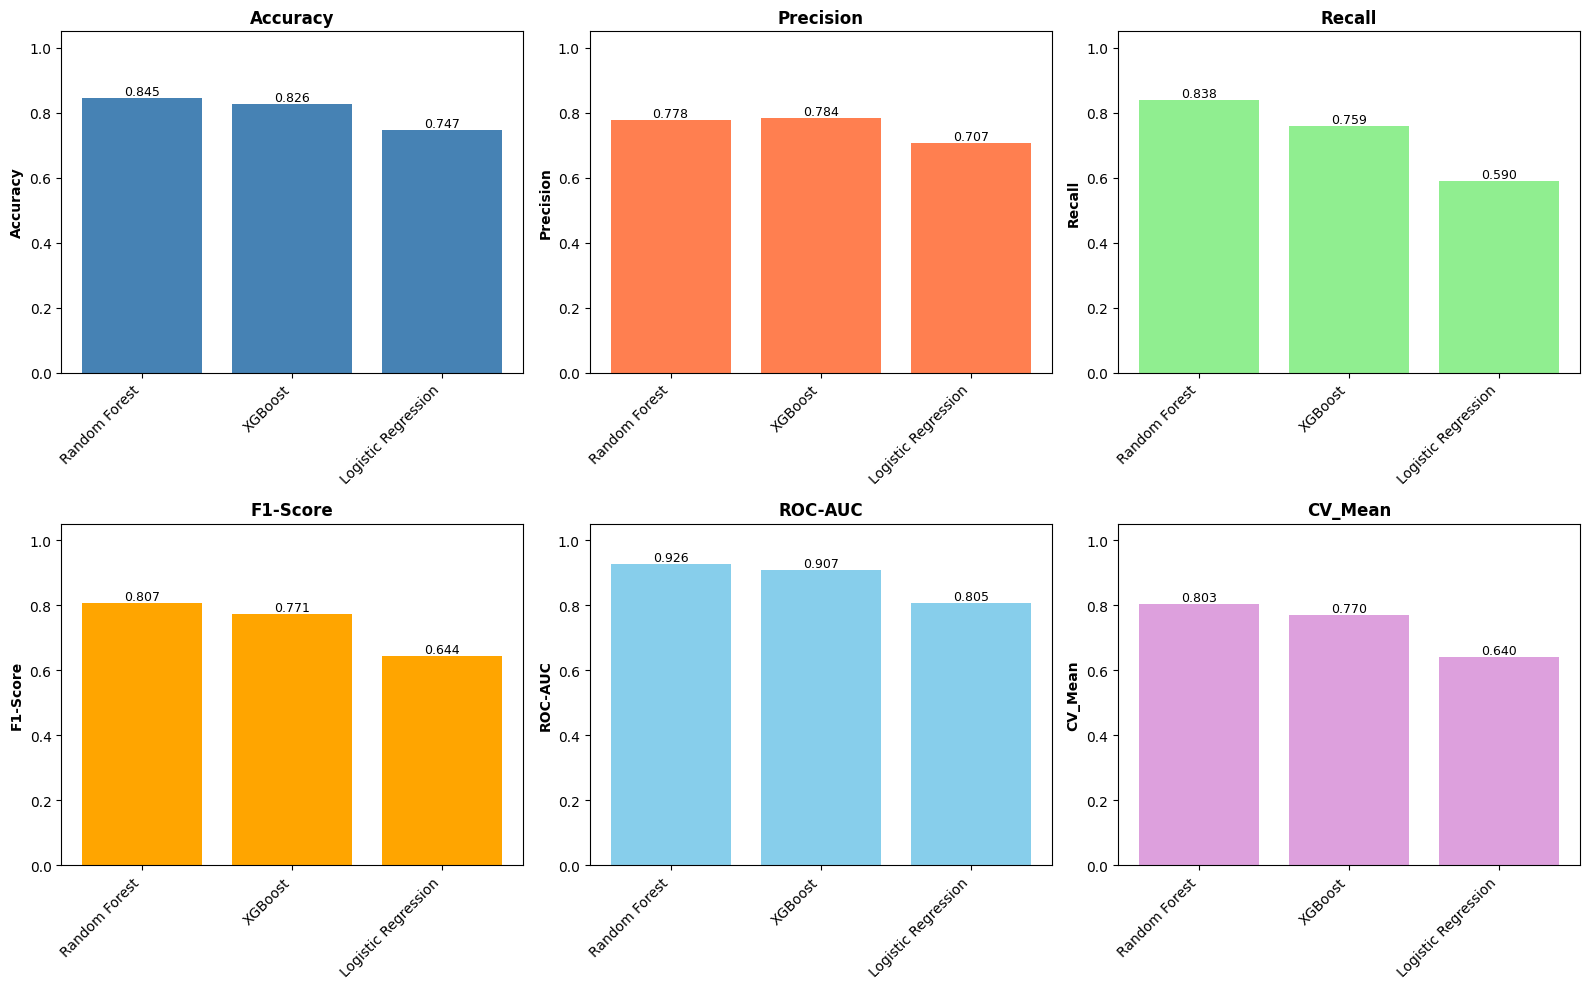

✅ Analyse complète terminée!


In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'CV_Mean']
colors = ['steelblue', 'coral', 'lightgreen', 'orange', 'skyblue', 'plum']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors)):
    values = summary_df[metric].values
    models = summary_df['Model'].values
    bars = ax.bar(range(len(models)), values, color=color)
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric}', fontweight='bold', fontsize=12)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
    ax.set_ylim([0, 1.05])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Analyse complète terminée!")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    n_jobs=-1
)

clf.fit(X_all, y_all)
print("Accuracy :", clf.score(X_all, y_all))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all,
    test_size=0.4,
    random_state=42,
    stratify=y_all
)


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    n_jobs=-1,
    random_state=42
)

clf.fit(X_train, y_train)
train_acc = clf.score(X_train, y_train)
test_acc  = clf.score(X_test, y_test)

print("Accuracy train :", train_acc)
print("Accuracy test :", test_acc)